<a href="https://colab.research.google.com/github/tusarrpatel/Collab/blob/main/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is example of multiple regression

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Reading the wind turbine dataset

In [ ]:
windDS = pd.read_csv('/content/drive/MyDrive/training_data.csv')
windDS.head

##                   **DATA PRE-PROCESSING**






In [19]:
windDS.shape

(208910, 21)

**1.Checking for missing value**





In [21]:
windDS.isna().sum()


active_power              0
timestamp                 0
pitch_angle               0
reactive_power            0
nacelle_angle             0
nacelle_temp              0
wind_speed1               0
wind_speed2               0
wind_speed_avg            0
wind_angle                0
vane_angle                0
outdoor_temp              0
rotor_angular_velocity    0
rotor_bearing_temp        0
weather_temp              0
pressure                  0
humidity                  0
weather_wind_speed        0
weather_wind_angle        0
rain_1h                   0
snow_1h                   0
dtype: int64

**Conclusion:** The dataset does not have missing values

**2. Checking for duplicate rows**






In [22]:
windDS.duplicated().any()

False

**Conclusion**: The dataset does not have duplicate values

### **Exploratory Data Analysis**

**1. Distribution of the target variable**

<ipython-input-25-39f4c40688ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(windDS['active_power']);


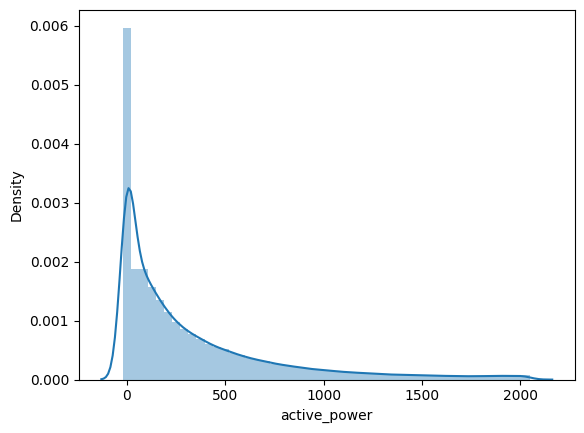

In [25]:
sns.distplot(windDS['active_power']);

**Conclusion**: It is normally distributed

2. How 'active_power' are related with other variables

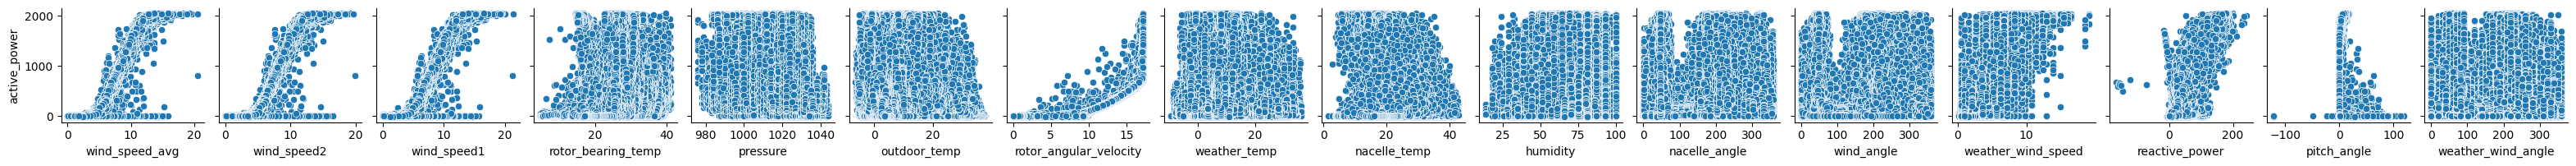

In [33]:
sns.pairplot(windDS, x_vars=['wind_speed_avg', 'wind_speed2', 'wind_speed1','rotor_bearing_temp','pressure','outdoor_temp','rotor_angular_velocity','weather_temp','nacelle_temp'
,'humidity','nacelle_angle','wind_angle','weather_wind_speed','reactive_power','pitch_angle','weather_wind_angle'], y_vars='active_power', height=2)
plt.show()

Setting the values for independent (X) variable and dependent (Y) variable



In [41]:
x = windDS[['wind_speed_avg', 'wind_speed2', 'wind_speed1','rotor_angular_velocity','reactive_power','pitch_angle']]
y = windDS['active_power']

Splitting the dataset into train and test set

In [42]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

Implementing the linear model

In [43]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

Intercepts and coefficents

In [44]:
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  -446.2070068414445
Coefficients:


[('wind_speed_avg', 219.04820776714757),
 ('wind_speed2', -30.87728149782791),
 ('wind_speed1', -1.6419159802637857),
 ('rotor_angular_velocity', -19.62195336296225)]

Prediction on the test set

In [45]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 444.03379843 1358.12453875  282.17398179 ...   32.11233856 -292.17441212
  486.38237493]


Actual values and the predicted values

In [46]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
186813,188.280000,444.033798
45433,1790.060100,1358.124539
64742,97.010002,282.173982
151113,156.500000,309.763085
24054,0.000000,-14.653853


Evaluating the Model

In [47]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 80.27
Mean Absolute Error: 144.33448863450195
Mean Square Error: 35942.15510861846
Root Mean Square Error: 189.58416365461136


**R squared:**  -->  percent falls on the regression line

**Mean Absolute Error:**  --> absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance

**Mean Square Error:** -->calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance

**Root Mean Square Error:** -->the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance.